In [4]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][0:] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

In [5]:
pretty_print_review_and_label(1)

NEGATIVE	:	story of a man who has unnatural feelings for a pig . starts out with a opening scene that is a terrific example of absurd comedy . a formal orchestra audience is turned into an insane  violent mob by the crazy chantings of it  s singers . unfortunately it stays absurd the whole time with no general narrative eventually making it just too off putting . even those from the era should be turned off . the cryptic dialogue would make shakespeare seem easy to a third grader . on a technical level it  s better than you might think with some good cinematography by future great vilmos zsigmond . future stars sally kirkland and frederic forrest can be seen briefly .  ...


In [6]:
len(reviews)

25000

In [7]:
len(labels)

25000

In [8]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretation e direction . not look       ...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more depressing than this . movie rating     music rating       ...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about   years ago  and i  m still screwed up from it .  ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both entertaining and educating .  br    br   i didn  t know what a weather girl was before i learned it here .  ...


In [11]:
from collections import Counter
import numpy as np 

In [13]:
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()


In [14]:
for i in range(len(reviews)):
    if(labels[i] == 'POSITIVE'):
        for word in reviews[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word] += 1
            total_counts[word]  += 1
            

In [16]:
positive_counts.most_common()

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937),
 ('but', 20822),
 ('movie', 19074),
 ('his', 17227),
 ('on', 17008),
 ('you', 16681),
 ('he', 16282),
 ('are', 14807),
 ('not', 14272),
 ('t', 13720),
 ('one', 13655),
 ('have', 12587),
 ('be', 12416),
 ('by', 11997),
 ('all', 11942),
 ('who', 11464),
 ('an', 11294),
 ('at', 11234),
 ('from', 10767),
 ('her', 10474),
 ('they', 9895),
 ('has', 9186),
 ('so', 9154),
 ('like', 9038),
 ('about', 8313),
 ('very', 8305),
 ('out', 8134),
 ('there', 8057),
 ('she', 7779),
 ('what', 7737),
 ('or', 7732),
 ('good', 7720),
 ('more', 7521),
 ('when', 7456),
 ('some', 7441),
 ('if', 7285),
 ('just', 7152),
 ('can', 7001),
 ('story', 6780),
 ('time', 6515),
 ('my', 6488),
 ('g

In [17]:
negative_counts.most_common()

[('', 561462),
 ('.', 167538),
 ('the', 163389),
 ('a', 79321),
 ('and', 74385),
 ('of', 69009),
 ('to', 68974),
 ('br', 52637),
 ('is', 50083),
 ('it', 48327),
 ('i', 46880),
 ('in', 43753),
 ('this', 40920),
 ('that', 37615),
 ('s', 31546),
 ('was', 26291),
 ('movie', 24965),
 ('for', 21927),
 ('but', 21781),
 ('with', 20878),
 ('as', 20625),
 ('t', 20361),
 ('film', 19218),
 ('you', 17549),
 ('on', 17192),
 ('not', 16354),
 ('have', 15144),
 ('are', 14623),
 ('be', 14541),
 ('he', 13856),
 ('one', 13134),
 ('they', 13011),
 ('at', 12279),
 ('his', 12147),
 ('all', 12036),
 ('so', 11463),
 ('like', 11238),
 ('there', 10775),
 ('just', 10619),
 ('by', 10549),
 ('or', 10272),
 ('an', 10266),
 ('who', 9969),
 ('from', 9731),
 ('if', 9518),
 ('about', 9061),
 ('out', 8979),
 ('what', 8422),
 ('some', 8306),
 ('no', 8143),
 ('her', 7947),
 ('even', 7687),
 ('can', 7653),
 ('has', 7604),
 ('good', 7423),
 ('bad', 7401),
 ('would', 7036),
 ('up', 6970),
 ('only', 6781),
 ('more', 6730),
 ('

In [18]:
pos_neg_ratios =  Counter()

In [27]:
for term,cnt in list(total_counts.most_common()):
    if(cnt > 10):
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio
for word,ratio in pos_neg_ratios.most_common():
    if(ratio > 1):
        pos_neg_ratios[word] = np.log(ratio)
    else:
        pos_neg_ratios[word] = -np.log(1/(ratio+0.01))

In [30]:
pos_neg_ratios

Counter({'': -0.009628978766657269,
         'heroics': 0.8754687373538999,
         'aesthetics': 0.7884573603642703,
         'ringwald': -0.1553051921740832,
         'seductress': -0.27443684570176036,
         'g': 0.03738753207162041,
         'melancholic': 2.6390573296152584,
         'tokyo': -0.14740875190132569,
         'climate': 1.455287232606842,
         'puddle': -0.8633076894446872,
         'ghoul': -2.4427317247372873,
         'metaphors': 0.22314355131420976,
         'uncles': 1.2039728043259361,
         'lynchian': 0.009950330853168092,
         'tackles': 0.5108256237659907,
         'calendar': 0.009950330853168092,
         'synopsis': -0.8915981192837835,
         'oddly': -0.24944803920094458,
         'grandeur': 0.8649974374866045,
         'remote': -0.5071108492446096,
         'venezuela': 1.9810014688665833,
         'started': -0.2541599171171149,
         'fulfilled': 0.32542240043462795,
         'savannah': 0.3364722366212129,
         'capacity'

In [31]:
list(reversed(pos_neg_ratios.most_common()))[0:30]

[('nepotism', -4.605170185988092),
 ('samberg', -4.605170185988092),
 ('unisols', -4.605170185988092),
 ('redline', -4.605170185988092),
 ('richie', -4.605170185988092),
 ('unintended', -4.605170185988092),
 ('gabbar', -4.605170185988092),
 ('mayeda', -4.605170185988092),
 ('tremors', -4.605170185988092),
 ('dorff', -4.605170185988092),
 ('munchie', -4.605170185988092),
 ('hazing', -4.605170185988092),
 ('sarne', -4.605170185988092),
 ('panzram', -4.605170185988092),
 ('balding', -4.605170185988092),
 ('berkowitz', -4.605170185988092),
 ('stirba', -4.605170185988092),
 ('clowns', -4.605170185988092),
 ('jang', -4.605170185988092),
 ('flemming', -4.605170185988092),
 ('slater', -4.605170185988092),
 ('sleepaway', -4.605170185988092),
 ('crapfest', -4.605170185988092),
 ('celestine', -4.605170185988092),
 ('asin', -4.605170185988092),
 ('orchid', -4.605170185988092),
 ('milius', -4.605170185988092),
 ('hee', -4.605170185988092),
 ('pharaoh', -4.605170185988092),
 ('triton', -4.6051701859

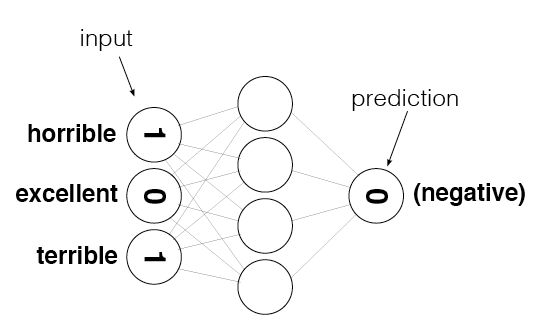

In [34]:
from IPython.display import Image
review = "Thsi was a horrible movie"
Image(filename="sentiment_network.png")

In [36]:
vocab = set(total_counts.keys())
vocab_size = len(vocab)
print(vocab_size)

74074


In [38]:
import numpy as np
layer_0 = np.zeros((1,vocab_size))
layer_0

array([[0., 0., 0., ..., 0., 0., 0.]])

In [39]:
word2index = {}
for i, word in enumerate(vocab):
    word2index[word] = i
    
word2index

{'': 0,
 'outclassed': 1,
 'tyranosaurous': 46683,
 'analytic': 2,
 'progressional': 3,
 'aquarian': 4,
 'dismemberments': 5,
 'hieroglyphs': 12330,
 'aesthetics': 6,
 'ringwald': 7,
 'boners': 8,
 'yeeshhhhhhhhhhhhhhhhh': 9,
 'weixler': 10,
 'parlays': 11,
 'ayda': 12,
 'lynda': 13,
 'seductress': 14,
 'marius': 24473,
 'g': 15,
 'ambles': 17,
 'ballpark': 18,
 'unwritten': 20,
 'hypothetical': 21,
 'ecologically': 22,
 'anorexia': 66524,
 'observed': 65558,
 'kywildflower': 23,
 'conflictive': 24,
 'ghoul': 25,
 'wildebeests': 26,
 'yuppies': 27,
 'ishai': 51327,
 'subdues': 34241,
 'erkia': 28,
 'tackles': 29,
 'guthrie': 30,
 'demilles': 31,
 'wiskey': 32,
 'gerolmo': 57469,
 'decomposing': 40,
 'knieval': 41,
 'washy': 35,
 'lajo': 43,
 'estoril': 37,
 'nantes': 38,
 'foresight': 39,
 'remote': 42,
 'zwick': 48624,
 'skywarriors': 46,
 'manasota': 48,
 'bile': 49,
 'cloying': 52,
 'fulfilled': 51,
 'duomo': 54,
 'reichskanzler': 65394,
 'genial': 56,
 'provincetown': 57,
 'utiliti

In [41]:
def update_input_layer(review):
    global layer_0
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1
update_input_layer(reviews[0])

In [42]:
layer_0

array([[18.,  0.,  0., ...,  0.,  0.,  0.]])

In [43]:
def get_target_for_label(label):
    if(label) == 'POSITIVE':
        return 1
    else:
        return 0

In [45]:
get_target_for_label(labels[0])
get_target_for_label(labels[1])

0

In [69]:
import time
import os,sys 
import numpy as np


In [74]:
class SentimentNetwork:
    def __init__(self, reviews, labels, hidden_nodes=10, learning_rate=0.1 ):
        np.random.seed(1)
        self.pre_process_data(reviews, labels)
        self.init_network(len(self.review_vocab),hidden_nodes,1,learning_rate)
    def pre_process_data(self,reviews, labels):
        review_vocab=set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
    def init_network(self,input_nodes,hidden_nodes,output_nodes,learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights

        # These are the weights between the input layer and the hidden layer.
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
        
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        self.layer_0 = np.zeros((1,input_nodes))
    
    def update_input_layer(self,review):
        self.layer_0 *= 0
        
        for word in review.split(" "):
            # NOTE: This if-check was not in the version of this method created in Project 2,
            #       and it appears in Andrew's Project 3 solution without explanation. 
            #       It simply ensures the word is actually a key in word2index before
            #       accessing it, which is important because accessing an invalid key
            #       with raise an exception in Python. This allows us to ignore unknown
            #       words encountered in new reviews.
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] += 1

    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
    
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def train(self, training_reviews, training_labels):
        assert(len(training_reviews) == len(training_labels))
        correct_so_far = 0

        # Remember when we started for printing time statistics
        start = time.time()
        for i in range(len(training_reviews)):
            
            # Get the next review and its correct label
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer
            self.update_input_layer(review)

            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)
            # Output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
            layer_2_error = layer_2 - self.get_target_for_label(label) 
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)
            
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error
            
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step
            
            if(layer_2 >= 0.5 and label == 'POSITIVE'):
                correct_so_far += 1
            elif(layer_2 < 0.5 and label == 'NEGATIVE'):
                correct_so_far += 10
            
            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        correct = 0

        # we'll time how many predictions per second we make
        start = time.time()

        # Loop through each of the given reviews and call run to predict
        # its label. 
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the prediction process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")

    def run(self,review):
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        # Return POSITIVE for values above greater-than-or-equal-to 0.5 in the output layer;
        # return NEGATIVE for other values
        if(layer_2[0] >= 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        
            
            
    
    

In [75]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

In [82]:
mlp.test(reviews[-1000:],labels[-1000:])
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%:61.6%
Progress:10.4% Speed(reviews/sec):80.85 #Correct:10091 #Trained:2501 Training Accuracy:403.%
Progress:20.8% Speed(reviews/sec):78.21 #Correct:19881 #Trained:5001 Training Accuracy:397.%
Progress:31.2% Speed(reviews/sec):77.90 #Correct:29531 #Trained:7501 Training Accuracy:393.%
Progress:41.6% Speed(reviews/sec):79.22 #Correct:39616 #Trained:10001 Training Accuracy:396.%
Progress:52.0% Speed(reviews/sec):79.74 #Correct:49902 #Trained:12501 Training Accuracy:399.%
Progress:62.5% Speed(reviews/sec):80.22 #Correct:60092 #Trained:15001 Training Accuracy:400.%
Progress:72.9% Speed(reviews/sec):80.69 #Correct:69983 #Trained:17501 Training Accuracy:399.%
Progress:83.3% Speed(reviews/sec):81.39 #Correct:80218 #Trained:20001 Training Accuracy:401.%
Progress:93.7% Speed(reviews/sec):81.96 #Correct:90322 #Trained:22501 Training Accuracy:401.%
Progress:99.9% Speed(reviews/sec):82.36 #Correct:96596 #Trained:2400

#It dint work because the learning rate is too high! why ? 


In [83]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.01)

In [84]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:12.2% Speed(reviews/sec):663.0 #Correct:62 #Tested:123 Testing Accuracy:50.4%

Progress:26.1% Speed(reviews/sec):703.3 #Correct:131 #Tested:262 Testing Accuracy:50.0%

Progress:38.7% Speed(reviews/sec):692.3 #Correct:194 #Tested:388 Testing Accuracy:50.0%

Progress:49.9% Speed(reviews/sec):668.5 #Correct:250 #Tested:500 Testing Accuracy:50.0%

Progress:62.1% Speed(reviews/sec):664.9 #Correct:311 #Tested:622 Testing Accuracy:50.0%

Progress:76.3% Speed(reviews/sec):680.3 #Correct:382 #Tested:764 Testing Accuracy:50.0%

Progress:88.3% Speed(reviews/sec):674.7 #Correct:442 #Tested:884 Testing Accuracy:50.0%

Progress:98.4% Speed(reviews/sec):657.2 #Correct:493 #Tested:985 Testing Accuracy:50.0%

Progress:99.9% Speed(reviews/sec):653.3 #Correct:500 #Tested:1000 Testing Accuracy:50.0%

In [85]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.001)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):84.33 #Correct:4840 #Trained:2501 Training Accuracy:193.%
Progress:20.8% Speed(reviews/sec):75.05 #Correct:12646 #Trained:5001 Training Accuracy:252.%
Progress:31.2% Speed(reviews/sec):73.36 #Correct:20210 #Trained:7501 Training Accuracy:269.%
Progress:41.6% Speed(reviews/sec):68.73 #Correct:29442 #Trained:10001 Training Accuracy:294.%
Progress:52.0% Speed(reviews/sec):66.71 #Correct:38402 #Trained:12501 Training Accuracy:307.%
Progress:62.5% Speed(reviews/sec):68.24 #Correct:47187 #Trained:15001 Training Accuracy:314.%
Progress:72.9% Speed(reviews/sec):68.35 #Correct:56267 #Trained:17501 Training Accuracy:321.%
Progress:83.3% Speed(reviews/sec):68.64 #Correct:65451 #Trained:20001 Training Accuracy:327.%
Progress:93.7% Speed(reviews/sec):69.82 #Correct:75147 #Trained:22501 Training Accuracy:333.%
Progress:99.9% Speed(reviews/sec):70.74 #Correct:81315 #Trained:24000 Train